<a href="https://colab.research.google.com/github/Bigmanibrah/Bigmanibrah/blob/main/cat_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20

ROC-AUC Score: 0.57


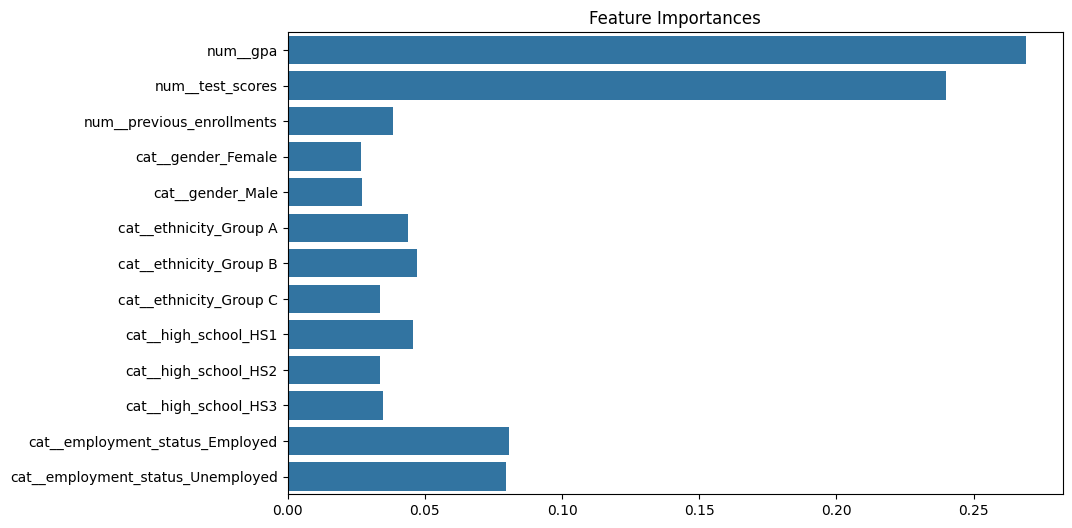

              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 10.9 MB/s eta 0:00:00


<ipython-input-1-044fa71e4a3e>:76: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-044fa71e4a3e>:77: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    'student_id': range(1, 101),
    'enrollment_history': ['1,2' if i % 2 == 0 else '1' for i in range(1, 101)],
    'gpa': np.random.uniform(2.0, 4.0, 100),
    'test_scores': np.random.randint(50, 100, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'ethnicity': np.random.choice(['Group A', 'Group B', 'Group C'], 100),
    'high_school': np.random.choice(['HS1', 'HS2', 'HS3'], 100),
    'employment_status': np.random.choice(['Employed', 'Unemployed'], 100),
    'enrollment_status': np.random.choice([0, 1], 100)
})

data.fillna(method='ffill', inplace=True)


data['previous_enrollments'] = data['enrollment_history'].apply(lambda x: len(x.split(',')))
data['average_grade'] = data['gpa']

X = data.drop(columns=['student_id', 'enrollment_history', 'enrollment_status'])
y = data['enrollment_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_features = ['gpa', 'test_scores', 'previous_enrollments']
categorical_features = ['gender', 'ethnicity', 'high_school', 'employment_status']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

feature_names = preprocessor.get_feature_names_out()
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.show()

report = classification_report(y_test, y_pred)
print(report)


!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='feature-importance-graph'),
    html.Pre(id='classification-report', children=str(report))
])

@app.callback(
    Output('feature-importance-graph', 'figure'),
    Input('feature-importance-graph', 'id')
)
def update_graph(_):
    return {
        'data': [{'x': feature_names, 'y': feature_importances, 'type': 'bar'}],
        'layout': {'title': 'Feature Importances'}
    }

if __name__ == '__main__':
    app.run_server(debug=True)
